In [6]:
!pip install -q git+https://github.com/phatvucoder/pdatakit.git
!pip -q install gdown
!sudo apt-get update & sudo apt-get install unzip

In [7]:
!gdown 17Q1JYuL0pU4eeXPqDFzz6P5ohxGM-BnP
!unzip -q obj_mbkgr -d dataset
!rm -rf /kaggle/working/dataset/__MACOSX

Downloading...
From (original): https://drive.google.com/uc?id=17Q1JYuL0pU4eeXPqDFzz6P5ohxGM-BnP
From (redirected): https://drive.google.com/uc?id=17Q1JYuL0pU4eeXPqDFzz6P5ohxGM-BnP&confirm=t&uuid=40968375-9f9c-43d0-b0a5-ec9f9cfbc9d0
To: /kaggle/working/obj_mbkgr.zip
100%|███████████████████████████████████████| 1.60G/1.60G [00:10<00:00, 151MB/s]


In [8]:
from pdatakit.pod.data_processor import DataProcessor
from pdatakit.pod.data_formatter import FormatType
import shutil

In [9]:
# shutil.copytree('/kaggle/input/bkai2024', '/kaggle/working/bkai2024')

In [10]:
processor = DataProcessor(
    data_root='./dataset',
    image_extension='jpg',
    label_extension='txt',
    train_size=0.7,
    val_size=0.2,
    test_size=0.1,
    random_state=42
)

In [11]:
for i in range(4, 8):
    processor.process_labels(i, i-4)

Replacing '4' with '0' in label files...
Label replacement completed. Processed 11520 files, modified 3867 files.
Replacing '5' with '1' in label files...
Label replacement completed. Processed 11520 files, modified 2683 files.
Replacing '6' with '2' in label files...
Label replacement completed. Processed 11520 files, modified 1617 files.
Replacing '7' with '3' in label files...
Label replacement completed. Processed 11520 files, modified 1849 files.


In [12]:
processor.split_data()

Data splitting completed.
Training samples: 8046
Validation samples: 2319
Testing samples: 1155


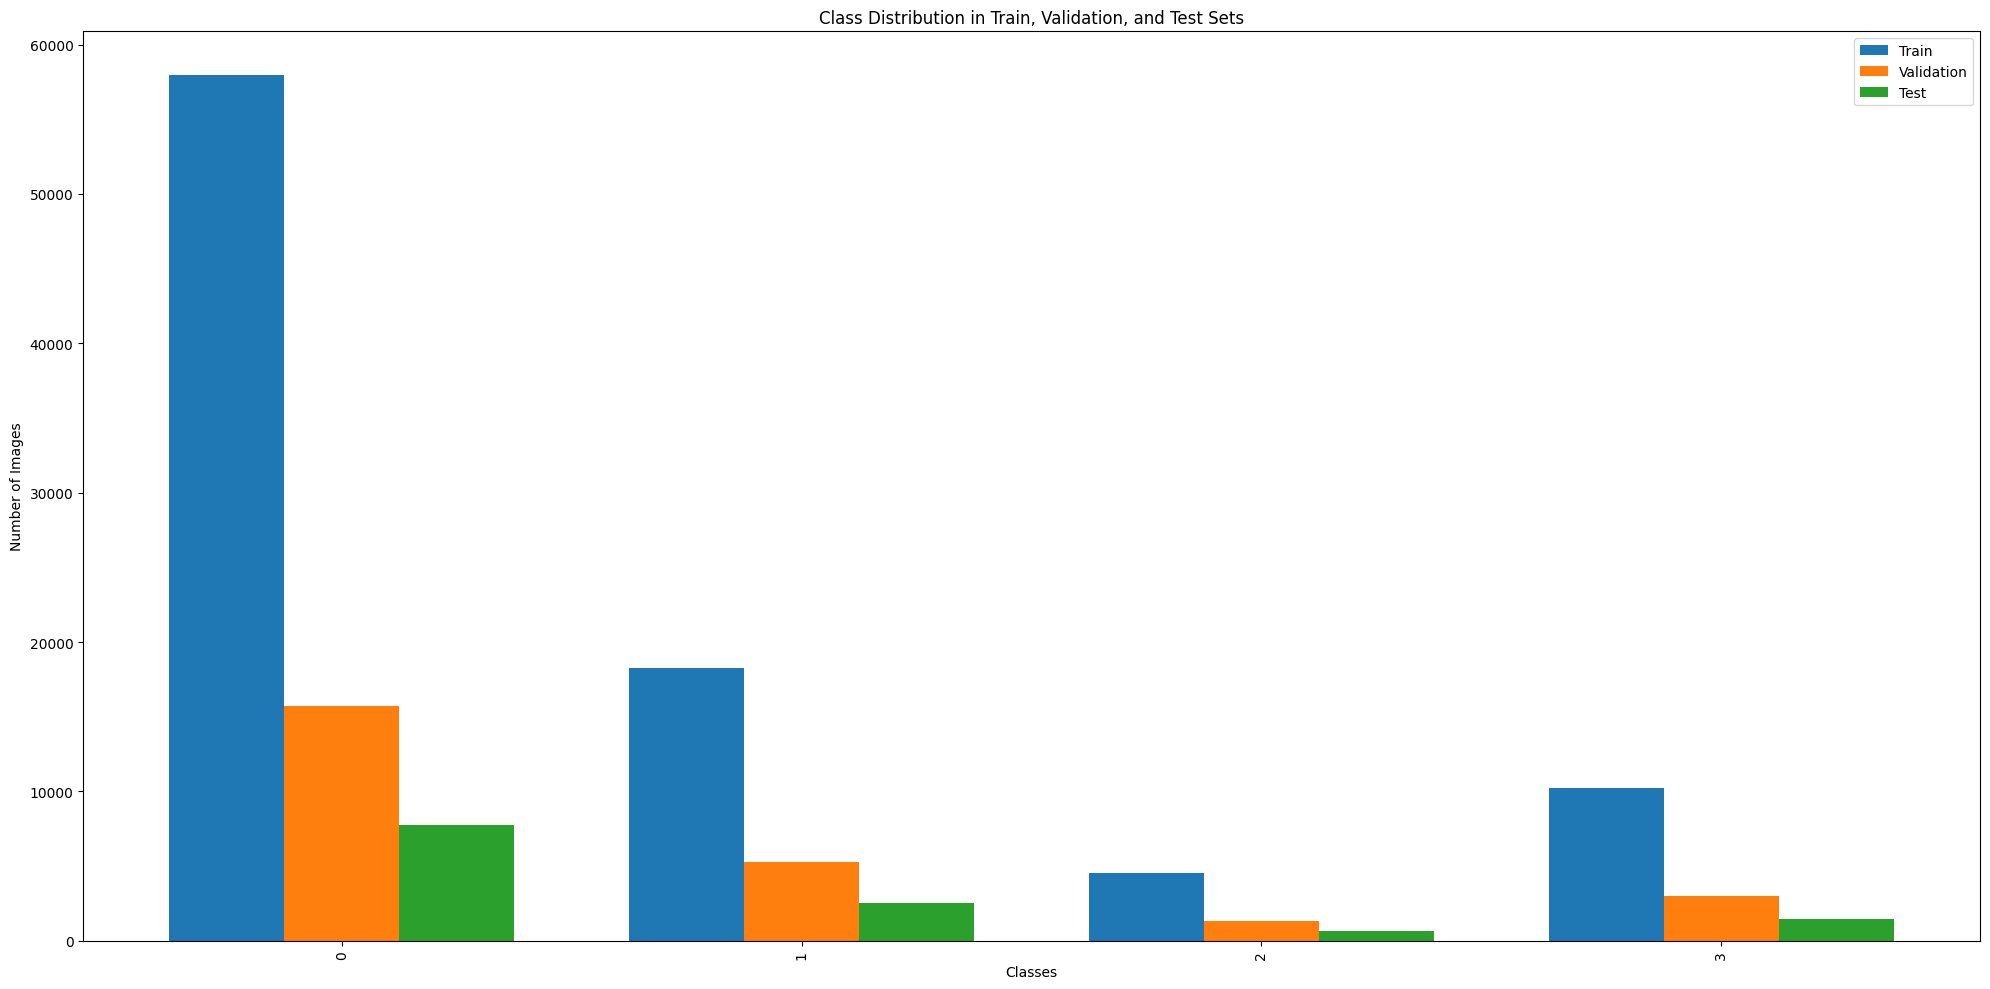

In [13]:
processor.visualize_distributions()

In [14]:
class_mapping = {
    0: 'motorbike',
    1: 'car',
    2: 'bus',
    3: 'truck'
}

# Format the data into YOLO New format and save to 'formatted_data' directory
processor.format_data(
    output_dir='./yolo_data',
    format_type=FormatType.YOLO_NEW,
    class_mapping=class_mapping
)

Creating YOLO New format...
Created data.yaml at yolo_data/data.yaml
YOLO New format created successfully.
Data formatted into yolo_new format and saved to ./yolo_data.


In [15]:
processor.summary()

===== Data Manager Summary =====
Data Root: ./dataset
Image Extension: jpg
Label Extension: txt
Total Images: 11520
Total Labels: 11520
Training Samples: 8046
Validation Samples: 2319
Testing Samples: 1155
Class Distribution in Training Set:
  0: 57988
  1: 18288
  2: 4564
  3: 10216
Class Distribution in Validation Set:
  0: 15738
  1: 5264
  2: 1305
  3: 3033
Class Distribution in Testing Set:
  0: 7737
  1: 2556
  2: 628
  3: 1447


In [16]:
import numpy as np

class_distribution = processor.splitter.get_class_distribution()
total_samples_per_class = np.sum(class_distribution, axis=0)
total_samples = np.sum(total_samples_per_class)
class_weights = total_samples / total_samples_per_class
class_weights

array([ 1.58064397,  4.93197487, 19.81899338,  8.76183996])

In [17]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.34 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)


In [19]:
!yolo train data=/kaggle/working/yolo_data/data.yaml model=yolo11n.pt epochs=100 batch=64 device=0,1 cache=ram

Ultralytics 8.3.34 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
                                                 CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/working/yolo_data/data.yaml, epochs=100, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=ram, device=(0, 1), workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fal

In [20]:
import shutil
shutil.copy('/kaggle/working/runs/detect/train/weights/best.pt', '/kaggle/working/base_large_lr.pt')

from IPython.display import FileLink
FileLink(r'base_large_lr.pt')

/kaggle/working/base_large_lr.pt